
# Iterated Local Search (ILS) for Traveling Salesman Problem (TSP)




This project implements a solution for the Traveling Salesman Problem (TSP) using the Iterated Local Search (ILS) algorithm, written in Python. It includes both **Sequential** and **Parallel Execution** approaches to solve TSP instances using `tsplib95`. Results are saved in Excel files to track the best route cost and time taken per iteration.

## Table of Contents
1. Overview
2. Concepts and Techniques
   - Traveling Salesman Problem (TSP)
   - Iterated Local Search (ILS)
   - Nearest Neighbor Heuristic
   - 2-Opt Local Search
   - Perturbation
3. Implementation
   - SequentialExecution Class
   - ParallelExecution Class
4. Execution and Results
5. Dependencies
6. Usage

---

## Overview
The TSP is a combinatorial optimization problem where a salesman must visit each city exactly once and return to the starting point, aiming to minimize the total travel distance. This project leverages the **Iterated Local Search (ILS)** algorithm with nearest-neighbor and 2-opt techniques to find a near-optimal route. It provides two modes of execution:
1. **Sequential Execution** (single-threaded)
2. **Parallel Execution** (multi-threaded)

## Concepts and Techniques

### Traveling Salesman Problem
In TSP, the objective is to find the shortest possible tour that visits each city once and returns to the origin. It’s an NP-hard problem widely used in operations research, logistics, and route planning.

### Iterated Local Search (ILS)
ILS enhances the solution by iteratively refining an initial solution using local search and perturbation. The main steps include:
1. **Initialization**: Generate an initial solution.
2. **Local Search**: Use 2-opt to improve the solution by reversing segments.
3. **Perturbation**: Slightly modify the solution to explore new paths.
4. **Iteration**: Repeat until reaching maximum iterations or convergence.

### Nearest Neighbor Heuristic
This heuristic constructs a solution by:
1. Starting from a random city.
2. Moving to the nearest unvisited city until all cities are visited.

### 2-Opt Local Search
2-opt improves the current solution by iteratively swapping edges:
1. Choose two cities and reverse the segment between them.
2. If this results in a shorter path, accept the change.

### Perturbation
Perturbation introduces diversity by making random swaps in the solution. It helps escape local minima by exploring new paths.

## Implementation

### SequentialExecution Class
The `SequentialExecution` class implements the ILS in a single-threaded environment. Key methods include:
- **`__init__`**: Initializes the instance, loading city coordinates and setting up Excel logging.
- **`load_coordinates()`**: Loads city coordinates from the TSP instance.
- **`distance_cities()`**: Calculates distance between two cities.
- **`route_cost()`**: Computes the route cost.
- **`nearest_neighbour()`**: Generates an initial solution with the nearest neighbor approach.
- **`two_opt_local_search()`**: Improves the solution by applying 2-opt.
- **`perturbation()`**: Introduces perturbations to escape local minima.
- **`ils()`**: Main ILS loop where each iteration includes perturbation and local search. Results are logged in an Excel file.

### ParallelExecution Class
The `ParallelExecution` class implements ILS in a multi-threaded environment using Python’s threading library. Key methods include:
- **`__init__`**: Similar to `SequentialExecution`, with added handling for threads.
- **`iterations()`**: Executes ILS iterations in parallel.
- **`run_parallel_iterations()`**: Spawns multiple threads, each running the `iterations()` method.
- **`ils()`**: Main ILS function for parallel execution.

#### Key Difference:
In parallel execution, each thread runs ILS independently. A global semaphore ensures the best solution across threads is saved, and results are logged in Excel files.

## Execution and Results

### Sequential Execution
In sequential mode, the program executes ILS iteratively, tracking the best cost and route at each iteration. Results are saved to **`/results/results_sequential/results_sequential_{instance}.xlsx`**.

### Parallel Execution
In parallel mode, the program runs multiple threads to explore solutions concurrently, significantly reducing execution time. Results are saved to **`/results/results_parallel/results_parallel_{instance}.xlsx`**.

### Excel Logging
Each approach logs the following for each iteration:
- Iteration number
- Best cost found
- Time taken per iteration

## Dependencies

- Python 3.7+
- Libraries:
  - `tsplib95` for TSP instances
  - `random` and `time` for randomization and time tracking
  - `openpyxl` for Excel file handling
  - `threading` for parallel execution

Install dependencies:
```bash
pip install tsplib95 openpyxl
```

## Usage

1. **Run the Sequential Execution**:
   ```bash
   python sequential_execution.py
   ```

   **Inputs**:
   - TSP instance filename (e.g., "berlin52")
   - Maximum number of iterations

2. **Run the Parallel Execution**:
   ```bash
   python parallel_execution.py
   ```

   **Inputs**:
   - TSP instance filename (e.g., "berlin52")
   - Maximum number of iterations
   - Number of threads for parallel execution

---

### Example
```plaintext
Enter the instance filename (without extension, e.g., 'berlin52'): berlin52
Enter the maximum number of iterations: 1000
Enter the number of threads for parallel execution: 4
```

This will load `berlin52.tsp`, execute ILS for 1000 iterations in parallel with 4 threads, and save results to an Excel file.

---
```plaintext
Enter the instance filename (without extension, e.g., 'berlin52'): kroA100
Enter the maximum number of iterations: 10
```

This will load `kroA100.tsp`, execute ILS for 10 iterations in sequential with single thread, and save results to an Excel file.


This project is designed to help understand optimization techniques applied in TSP and how to leverage both single-threaded and multi-threaded approaches to solve combinatorial optimization problems effectively.

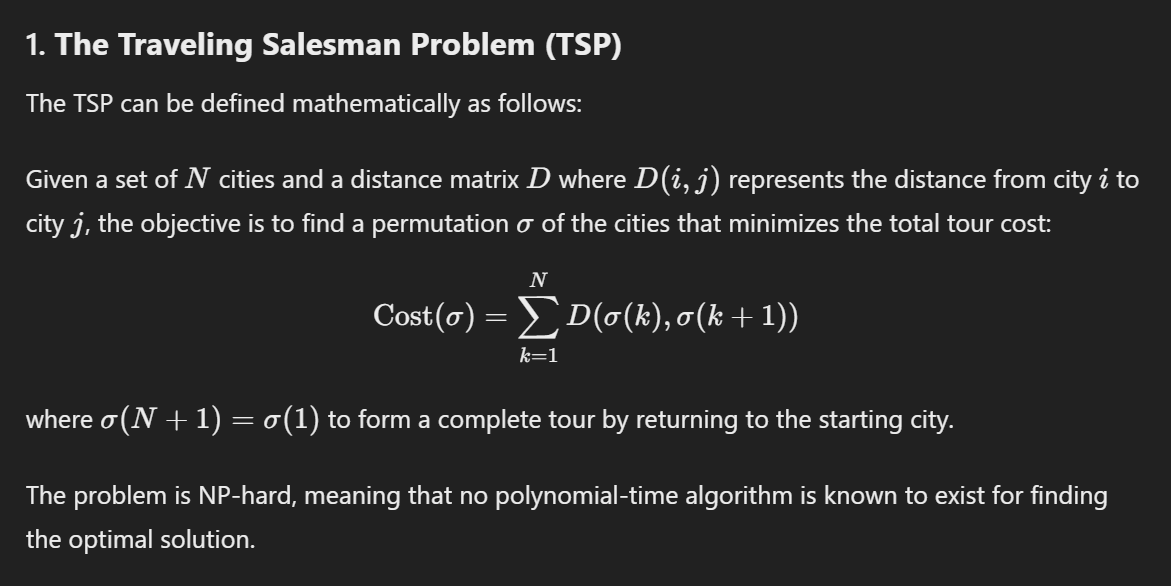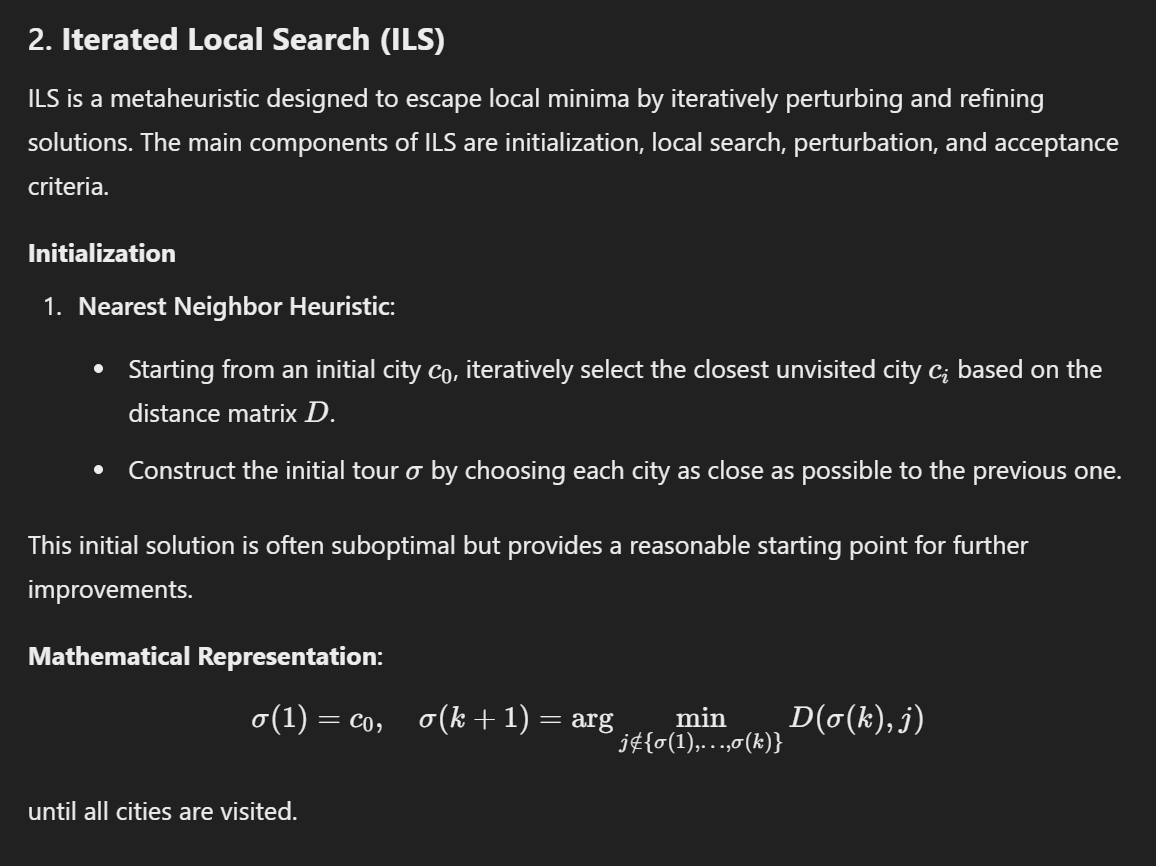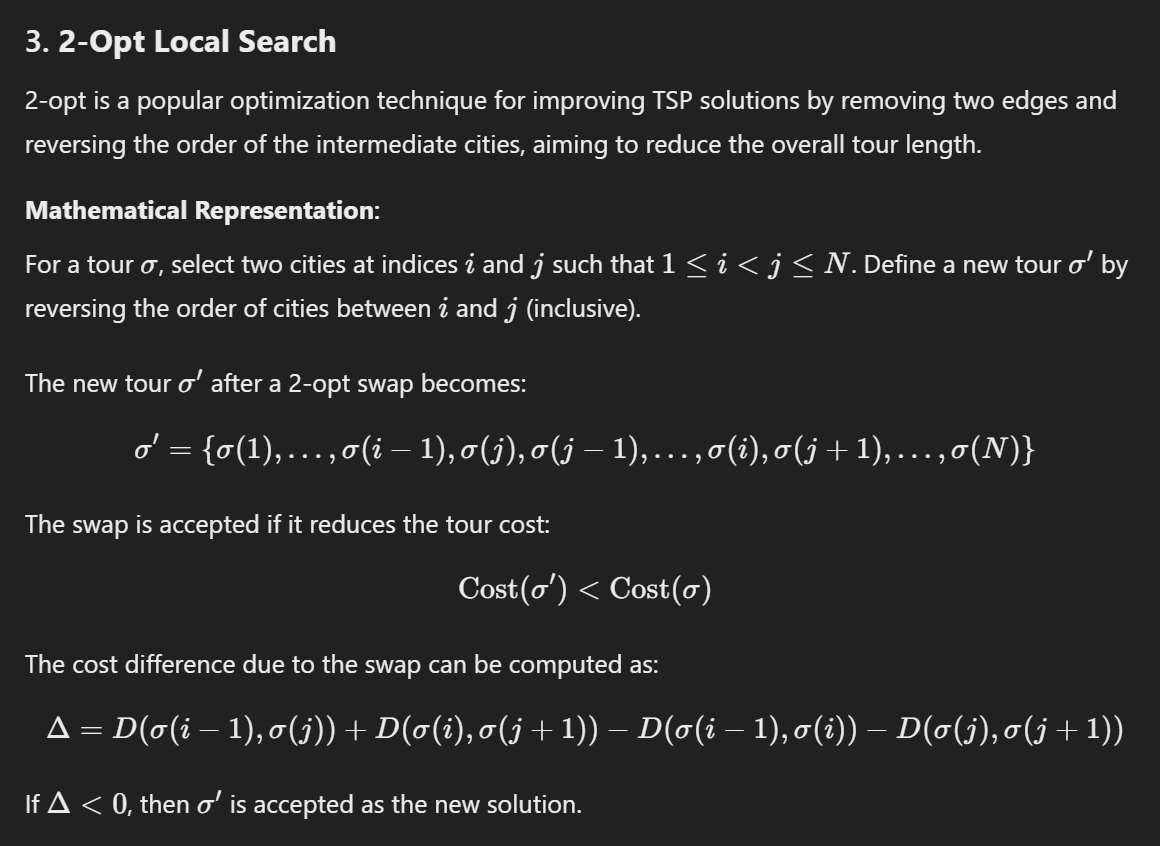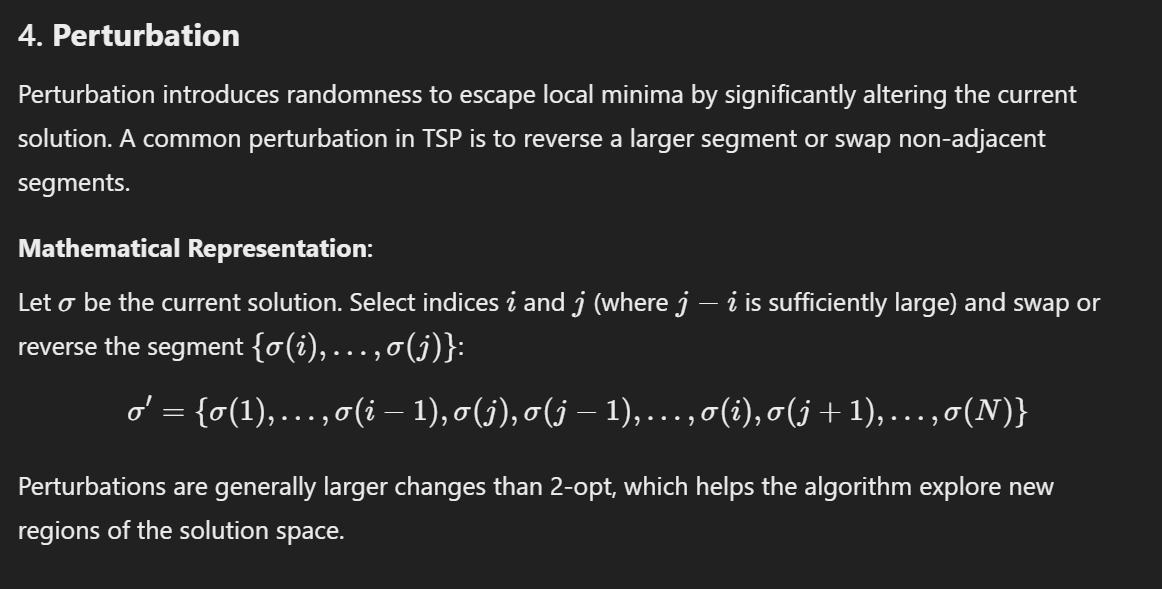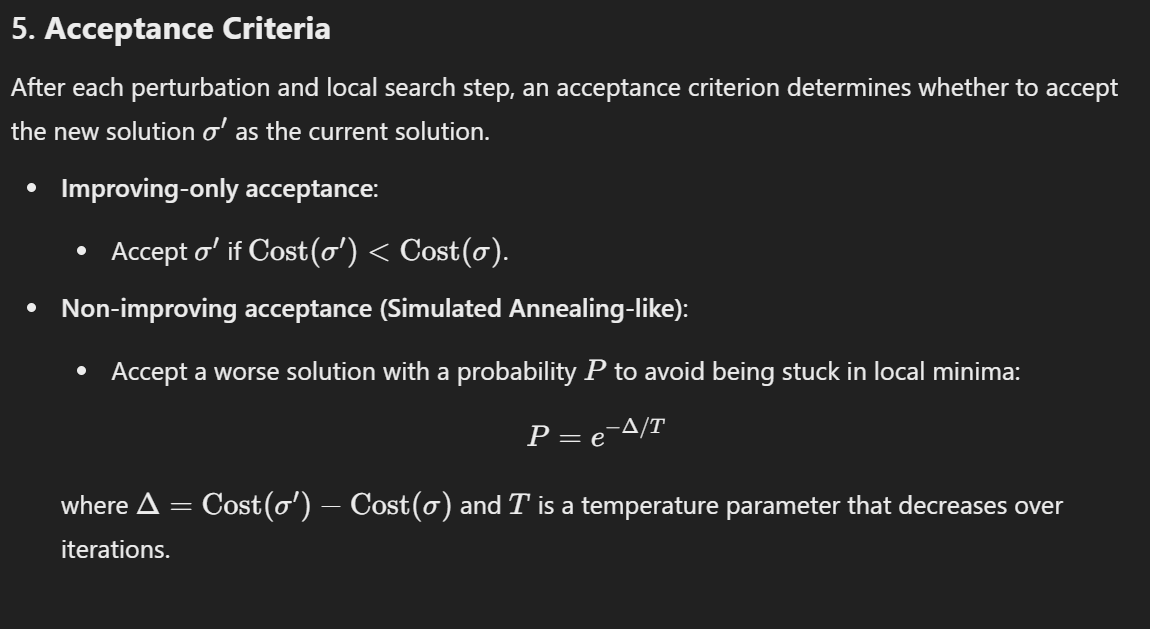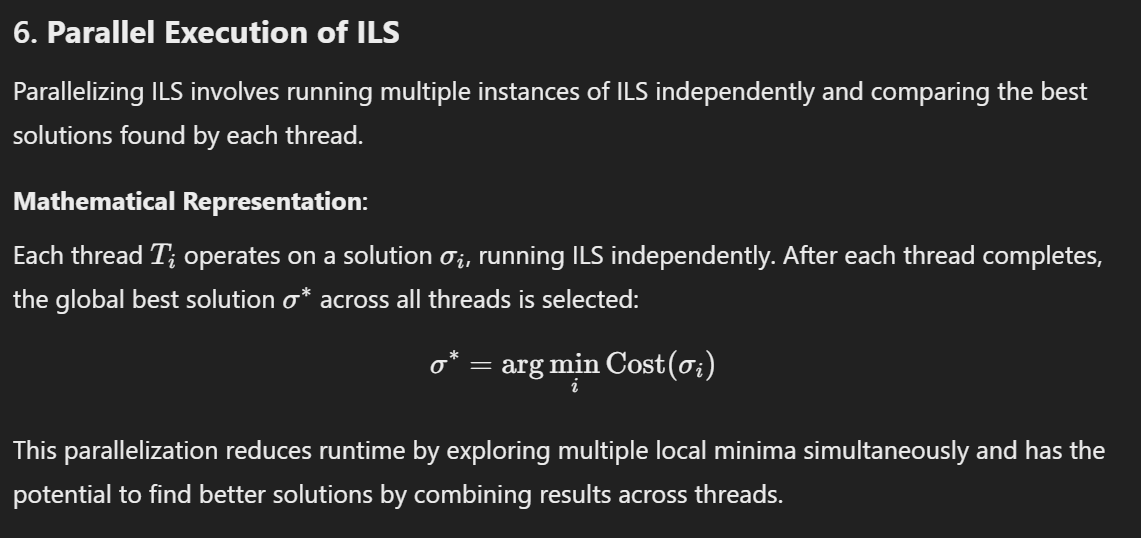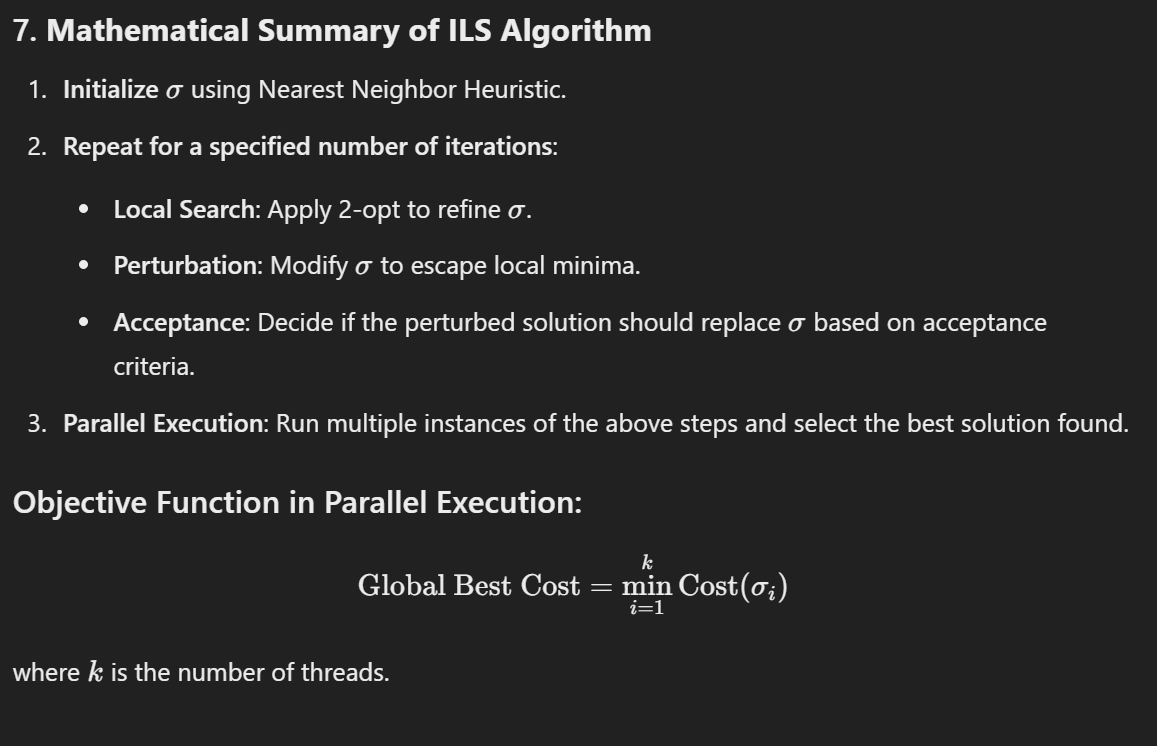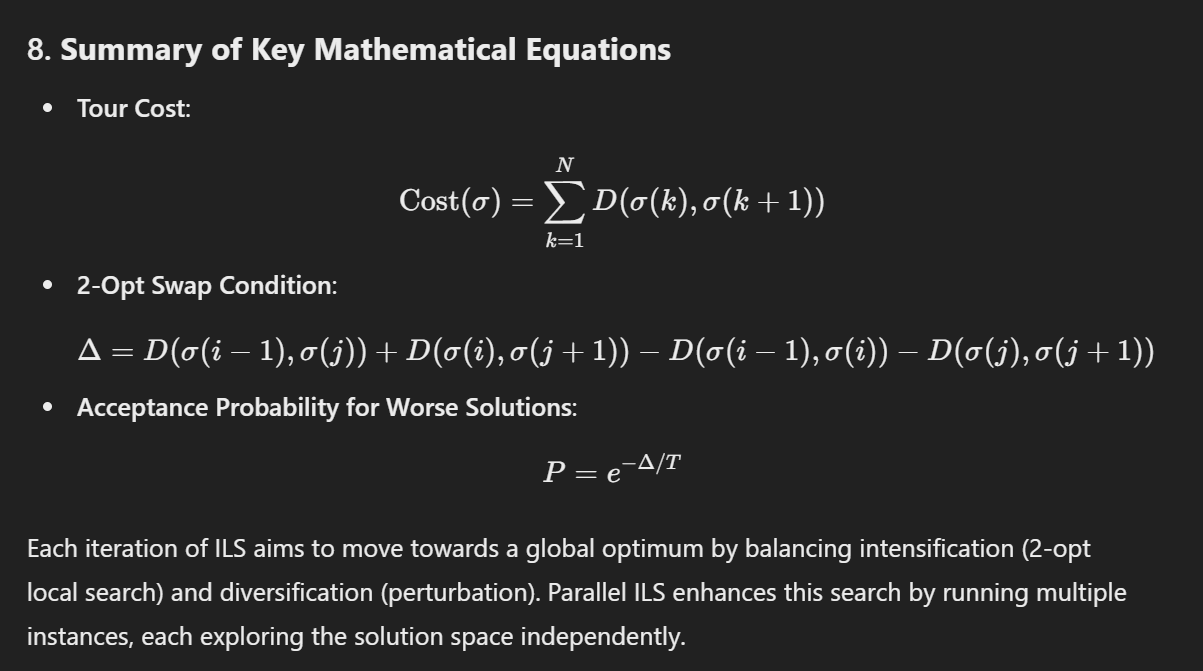

# Mounting of the drive :

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing needed libraries :

In [2]:
pip install tsplib95 pandas matplotlib seaborn scikit-learn pandas XlsxWriter openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
nx-cugraph-cu12 24.10.0 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.


#Import of the libraries :

In [4]:
# Import standard libraries for randomness, timing, and threading.
import random  # For generating random numbers, useful in random initializations or shuffling
import time  # For tracking time elapsed during operations or calculations
import threading  # For multi-threading, which can be useful in parallelizing tasks

# Import `pathlib` for file path management and `sys` for system-level configurations.
import pathlib  # Provides an object-oriented interface to handle file system paths
import sys  # Access system-specific parameters and functions

# Import `tsplib95` for handling TSP problem instances.
import tsplib95  # A library to load, manipulate, and solve Traveling Salesman Problem instances

# Import `pandas` for data manipulation and analysis.
import pandas as pd  # For data loading, manipulation, and saving in data frames

# Import `matplotlib` and `seaborn` for plotting and visualization.
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # Enhances matplotlib for creating attractive and informative statistical graphics

# Import `openpyxl` for reading and writing Excel files, especially if your results are saved in `.xlsx`.
import openpyxl  # For reading from and writing to Excel files in xlsx format

# Import scikit-learn's modules for model training, evaluation, and performance metrics.
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For regression using Random Forest algorithm
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

# Import `glob` to find all pathnames matching a specified pattern.
import glob  # Used to retrieve files/pathnames matching a specified pattern for batch processing


#Implementation of the Sequential Execution of the ILS :

Enter the instance filename (without extension, e.g., 'berlin52'): kroA100
Enter the maximum number of iterations: 10

Graph kroA100 - 10 Iterations

Iteration:1 - Best Cost:25771 - No Improvement: 0
Iteration:2 - Best Cost:25771 - No Improvement: 1
Iteration:3 - Best Cost:25771 - No Improvement: 2
Iteration:4 - Best Cost:25771 - No Improvement: 3
Iteration:5 - Best Cost:25771 - No Improvement: 4
Iteration:6 - Best Cost:25771 - No Improvement: 5
Iteration:7 - Best Cost:25771 - No Improvement: 6
Iteration:8 - Best Cost:25771 - No Improvement: 7
Iteration:9 - Best Cost:25771 - No Improvement: 8
Iteration:10 - Best Cost:25771 - No Improvement: 9
---------------------------------------------
Route Cost  : 25771
Processing Time : 29.058059453964233
Route Solution [63, 39, 53, 1, 43, 49, 72, 55, 79, 5, 88, 41, 7, 91, 0, 62, 30, 48, 73, 89, 3, 74, 25, 98, 46, 92, 27, 66, 57, 86, 50, 60, 24, 80, 68, 29, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 38, 84, 67, 96, 18, 64, 17, 69, 93, 21, 15, 87, 52, 

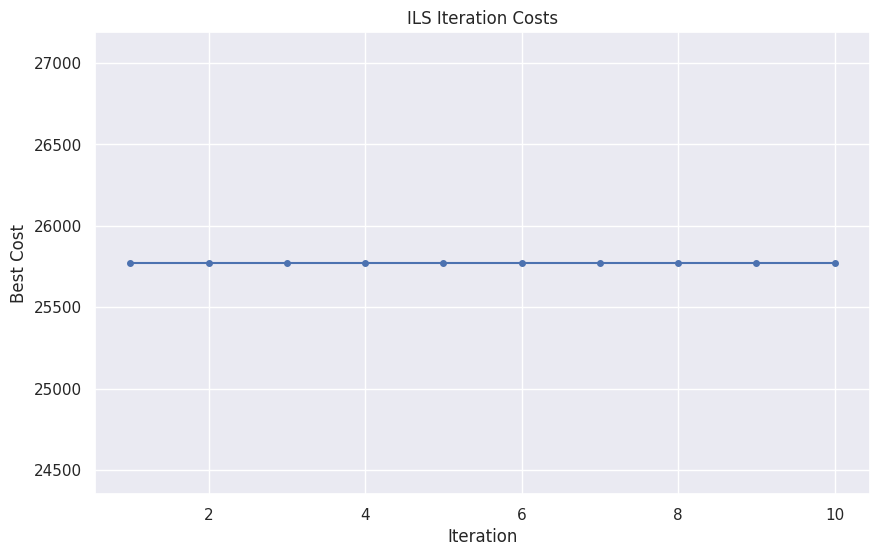

In [13]:
import time
import random
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import tsplib95
import pandas as pd

# Configure Seaborn for better plot aesthetics
sns.set(style="darkgrid")

class SequentialExecution:
    def __init__(self, instance, max_iterations):
        # Initialize the TSP problem instance and maximum iteration count.
        self.instance = instance  # TSP instance filename (without extension)
        self.iteration_max = max_iterations  # Maximum iterations for ILS

        # Load the problem instance from the specified path
        self.problem = tsplib95.load(f'/content/drive/MyDrive/iterated-local-search-traveling-salesman/instances/{instance}.tsp')
        self.problem.get_graph()  # Retrieve the graph representation of the problem
        self.problem_description = self.problem.as_keyword_dict()  # Convert problem to a dictionary format

        # Initialize cities and coordinate lists
        self.cities = [i - 1 for i in list(self.problem.get_nodes())]  # List of city nodes (offset by 1)
        self.n_cities = len(self.cities)  # Number of cities in the TSP instance
        self.coord_x = []  # X coordinates of cities (if 2D)
        self.coord_y = []  # Y coordinates of cities (if 2D)
        self.load_coordinates()  # Load coordinates based on problem type

        # Initialize solution placeholders
        self.best_solution = None
        self.best_cost = None
        self.iteration_data = []  # Store iteration and best cost for plotting

    def load_coordinates(self):
        """Load the coordinates for each city if the problem uses 2D Euclidean distances."""
        if self.problem_description['EDGE_WEIGHT_TYPE'] == 'EUC_2D':
            for i in range(1, self.n_cities + 1):
                x, y = self.problem_description['NODE_COORD_SECTION'][i]
                self.coord_x.append(x)
                self.coord_y.append(y)

    def distance_cities(self, city_a, city_b):
        """Calculate and return the distance between two cities based on their coordinates."""
        coord = city_a + 1, city_b + 1  # Adjust for TSPLIB indexing (1-based)
        return self.problem.get_weight(*coord)  # Return distance weight between cities

    def route_cost(self, cities):
        """Calculate the total cost of a given route.

        Args:
            cities (list): List of cities representing a TSP route.

        Returns:
            int: Total route cost.
        """
        cost = 0
        # Sum the distance for each pair of consecutive cities
        for i in range(self.n_cities - 1):
            cost += self.distance_cities(cities[i], cities[i + 1])
        # Add the distance to return to the starting city
        cost += self.distance_cities(cities[-1], cities[0])
        return cost

    def nearest_neighbour(self, initial_city):
        """Generate a solution using the nearest neighbor heuristic.

        Args:
            initial_city (int): Starting city for the nearest neighbor search.

        Returns:
            list: Route generated using nearest neighbor heuristic.
        """
        solution_cities = [initial_city]  # Start route with the initial city
        current_city = initial_city  # Track the current city
        visited = [False] * self.n_cities  # Track visited cities
        visited[current_city] = True

        while len(solution_cities) < self.n_cities:
            min_distance = float('inf')
            next_city = None

            # Find the nearest unvisited city
            for candidate_city in range(self.n_cities):
                if not visited[candidate_city] and candidate_city != current_city:
                    cost = self.distance_cities(current_city, candidate_city)
                    if cost < min_distance:
                        min_distance = cost
                        next_city = candidate_city

            solution_cities.append(next_city)
            visited[next_city] = True
            current_city = next_city

        return solution_cities

    def two_opt_local_search(self, cities):
        """Improve a route using the 2-opt algorithm.

        Args:
            cities (list): Initial route to optimize.

        Returns:
            list: Optimized route using 2-opt swap.
        """
        best_route = cities[:]
        best_cost = self.route_cost(best_route)
        improved = False

        # Iterate through pairs of cities to perform 2-opt swaps
        for i in range(1, self.n_cities - 2):
            for j in range(i + 1, self.n_cities):
                if j - i == 1:
                    continue
                current_route = cities[:]
                # Reverse the segment between i and j
                current_route[i:j] = current_route[j - 1:i - 1:-1]
                new_cost = self.route_cost(current_route)

                # Update best route if an improvement is found
                if new_cost < best_cost:
                    best_cost = new_cost
                    best_route = current_route
                    improved = True

        return best_route if improved else cities

    def perturbation(self, cities):
        """Randomly swap two cities in the route to create a new solution.

        Args:
            cities (list): Current route.

        Returns:
            list: Route with two cities swapped.
        """
        i = random.randint(0, self.n_cities - 1)
        j = random.randint(0, self.n_cities - 1)
        cities[i], cities[j] = cities[j], cities[i]
        return cities

    def ils(self):
        """Perform Iterated Local Search (ILS) to find an improved solution for TSP."""
        start_time = time.time()

        # Generate an initial solution using nearest neighbor
        initial_city = random.randint(0, self.n_cities - 1)
        solution = self.nearest_neighbour(initial_city)
        solution = self.two_opt_local_search(solution)
        cost = self.route_cost(solution)

        self.best_solution = solution
        self.best_cost = cost

        count_no_improvement = 0

        # Create a new Excel workbook and sheet to store iteration results
        workbook = openpyxl.Workbook()
        sheet = workbook.active
        sheet.title = "ILS Results"

        # Add headers for the Excel sheet
        sheet.append(["Iteration", "Best Cost", "Iteration Time (s)"])

        # Main ILS loop
        for iteration in range(self.iteration_max):
            iteration_start_time = time.time()

            print(f"Iteration:{iteration + 1} - Best Cost:{self.best_cost} - No Improvement: {count_no_improvement}")

            initial_cost = self.best_cost

            # Apply perturbation to explore new solution space
            solution = self.perturbation(solution)
            perturbation_cost = self.route_cost(solution)

            if perturbation_cost < self.best_cost:
                count_no_improvement = 0
                self.best_cost = perturbation_cost
                self.best_solution = solution[:]

            # Apply local search to refine solution
            solution = self.two_opt_local_search(solution)
            local_search_cost = self.route_cost(solution)

            if local_search_cost < self.best_cost:
                count_no_improvement = 0
                self.best_cost = local_search_cost
                self.best_solution = solution[:]

            if self.best_cost == initial_cost:
                count_no_improvement += 1

            if abs(self.best_cost - local_search_cost) / self.best_cost > 0.01:
                self.best_solution = solution[:]

            # Log each iteration result into Excel
            iteration_time = time.time() - iteration_start_time
            sheet.append([iteration + 1, self.best_cost, iteration_time])

            # Append iteration and cost to iteration_data for plotting
            self.iteration_data.append((iteration + 1, self.best_cost))

        # Save the results to the Excel file
        workbook.save(f'/content/drive/MyDrive/iterated-local-search-traveling-salesman/results/results_sequential/results_sequential_{self.instance}.xlsx')

        end_time = time.time()
        total_time = end_time - start_time

        print("---------------------------------------------")
        print(f"Route Cost  : {self.best_cost}")
        print(f"Processing Time : {total_time}")
        print(f"Route Solution {self.best_solution}")

    def plot_iteration_costs(self):
        """Plot the best route cost for each iteration to visualize improvements."""
        # Convert the iteration data to a DataFrame for easy plotting
        df = pd.DataFrame(self.iteration_data, columns=['Iteration', 'Best Cost'])
        plt.figure(figsize=(10, 6))
        plt.plot(df['Iteration'], df['Best Cost'], marker='o', markersize=4, color='b')
        plt.title("ILS Iteration Costs")
        plt.xlabel("Iteration")
        plt.ylabel("Best Cost")
        plt.show()

    def run(self):
        """Run the Iterated Local Search algorithm and plot results."""
        self.ils()
        self.plot_iteration_costs()

def main():
    # Main function to set up and start the ILS execution
    instance = input("Enter the instance filename (without extension, e.g., 'berlin52'): ").strip()
    max_iterations = int(input("Enter the maximum number of iterations: ").strip())
    print(f"\nGraph {instance} - {max_iterations} Iterations\n")
    execution = SequentialExecution(instance, max_iterations)
    execution.run()

if __name__ == "__main__":
    main()


#Implementation of the Parallel Execution of the ILS :

Enter the instance filename (without extension, e.g., 'berlin52'): berlin52
Enter the maximum number of iterations: 10
Enter the number of threads for parallel execution: 5

Graph berlin52 - 10 Iterations - 5 Threads

Thread:1 - Iteration:1 - Best Cost:8816 - No Improvement: 0
Thread:2 - Iteration:1 - Best Cost:8816 - No Improvement: 0
Thread:3 - Iteration:1 - Best Cost:8816 - No Improvement: 0
Thread:4 - Iteration:1 - Best Cost:8816 - No Improvement: 0
Thread:5 - Iteration:1 - Best Cost:8816 - No Improvement: 0
Thread:3 - Iteration:2 - Best Cost:8758 - No Improvement: 0
Thread:4 - Iteration:2 - Best Cost:8725 - No Improvement: 0Thread:1 - Iteration:2 - Best Cost:8645 - No Improvement: 0

Thread:5 - Iteration:2 - Best Cost:8645 - No Improvement: 0
Thread:2 - Iteration:2 - Best Cost:8816 - No Improvement: 1
Thread:3 - Iteration:3 - Best Cost:8558 - No Improvement: 0
Thread:4 - Iteration:3 - Best Cost:8624 - No Improvement: 0
Thread:1 - Iteration:3 - Best Cost:8644 - No Improvement: 0
Th

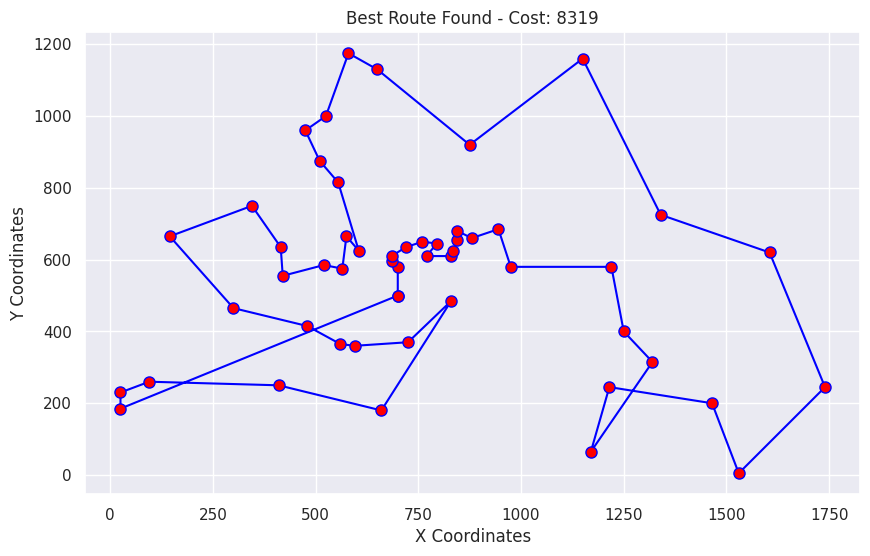

In [14]:
import tsplib95
import random
import time
import threading
import pathlib
import openpyxl
import matplotlib.pyplot as plt

class ParallelExecution:
    def __init__(self, instance, max_iterations, n_threads):
        self.instance = instance
        self.iteration_max = max_iterations
        self.n_threads = n_threads

        # Load the problem instance from the specified path
        self.problem = tsplib95.load(f'/content/drive/MyDrive/iterated-local-search-traveling-salesman/instances/{instance}.tsp')
        self.problem.get_graph()
        self.problem_description = self.problem.as_keyword_dict()

        self.cities = [i - 1 for i in list(self.problem.get_nodes())]
        self.n_cities = len(self.cities)

        self.coord_x = []
        self.coord_y = []
        self.load_coordinates()

        self.global_best_solution = []
        self.global_best_cost = []
        self.sem = threading.Semaphore()

        # Create or load the Excel file to store results
        self.results_file = pathlib.Path(f'/content/drive/MyDrive/iterated-local-search-traveling-salesman/results/results_parallel/results_parallel_{self.instance}.xlsx')
        if not self.results_file.exists():
            self.wb = openpyxl.Workbook()
            self.ws = self.wb.active
            self.ws.append(["Thread", "Iteration", "Best Cost", "Total Time"])  # Add headers
        else:
            self.wb = openpyxl.load_workbook(self.results_file)
            self.ws = self.wb.active

    def load_coordinates(self):
        if self.problem_description['EDGE_WEIGHT_TYPE'] == 'EUC_2D':
            for i in range(1, self.n_cities + 1):
                x, y = self.problem_description['NODE_COORD_SECTION'][i]
                self.coord_x.append(x)
                self.coord_y.append(y)

    def distance_cities(self, city_a, city_b):
        coord = city_a + 1, city_b + 1
        return self.problem.get_weight(*coord)

    def route_cost(self, cities):
        cost = 0
        for i in range(self.n_cities - 1):
            cost += self.distance_cities(cities[i], cities[i + 1])
        cost += self.distance_cities(cities[-1], cities[0])
        return cost

    def nearest_neighbour(self, initial_city):
        solution_cities = [initial_city]
        current_city = initial_city

        visited = [False] * self.n_cities
        visited[current_city] = True

        while len(solution_cities) < self.n_cities:
            min_distance = float('inf')
            next_city = None

            for candidate_city in range(self.n_cities):
                if not visited[candidate_city] and candidate_city != current_city:
                    cost = self.distance_cities(current_city, candidate_city)
                    if cost < min_distance:
                        min_distance = cost
                        next_city = candidate_city

            solution_cities.append(next_city)
            visited[next_city] = True
            current_city = next_city

        return solution_cities

    def two_opt_local_search(self, cities):
        best_route = cities[:]
        best_cost = self.route_cost(best_route)
        improved = False
        for i in range(1, self.n_cities - 2):
            for j in range(i + 1, self.n_cities):
                if j - i == 1:
                    continue
                current_route = cities[:]
                current_route[i:j] = current_route[j - 1:i - 1:-1]
                new_cost = self.route_cost(current_route)

                if new_cost < best_cost:
                    best_cost = new_cost
                    best_route = current_route
                    improved = True

        return best_route if improved else cities

    def perturbation(self, cities):
        i = random.randint(0, self.n_cities - 1)
        j = i + 1 if i + 1 < self.n_cities else i - 1
        cities[i], cities[j] = cities[j], cities[i]
        return cities

    def iterations(self, thread, solution, best_solution, best_cost):
        local = threading.local()
        local.solution = solution[:]
        local.best_solution = best_solution[:]
        local.best_cost = best_cost

        count_no_improvement = 0
        for iteration in range(self.iteration_max):
            print(f"Thread:{int(thread)+1} - Iteration:{iteration+1} - Best Cost:{local.best_cost} "
                  f"- No Improvement: {count_no_improvement}")
            initial_cost = local.best_cost

            # Perturbations
            local.solution = self.perturbation(local.solution)
            perturbation_cost = self.route_cost(local.solution)

            if perturbation_cost < local.best_cost:
                count_no_improvement = 0
                local.best_cost = perturbation_cost
                local.best_solution = local.solution[:]

            # Local Search
            local.solution = self.two_opt_local_search(local.solution)
            local_search_cost = self.route_cost(local.solution)

            if local_search_cost < local.best_cost:
                count_no_improvement = 0
                local.best_cost = local_search_cost
                local.best_solution = local.solution[:]

            if local.best_cost == initial_cost:
                count_no_improvement += 1

            if abs(local.best_cost - local_search_cost) / local.best_cost > 0.01:
                local.solution = local.best_solution[:]

            # Save iteration results in the Excel file
            self.ws.append([int(thread)+1, iteration+1, local.best_cost, time.time() - start_time])

        self.sem.acquire()
        if local.best_cost < self.global_best_cost[-1]:
            self.global_best_solution.append(local.best_solution[:])
            self.global_best_cost.append(local.best_cost)
        self.sem.release()

    def run_parallel_iterations(self, n_threads, initial_solution, initial_best_solution, initial_best_cost):
        threads = []
        for thread in range(n_threads):
            t = threading.Thread(target=self.iterations,
                                 args=(str(thread), initial_solution, initial_best_solution, initial_best_cost))
            t.start()
            threads.append(t)

        for thread in threads:
            thread.join()

    def plot_route(self):
        best_route = self.global_best_solution[-1]
        x_coords = [self.coord_x[city] for city in best_route] + [self.coord_x[best_route[0]]]
        y_coords = [self.coord_y[city] for city in best_route] + [self.coord_y[best_route[0]]]

        plt.figure(figsize=(10, 6))
        plt.plot(x_coords, y_coords, 'o-', color='blue', markerfacecolor='red', markersize=8)
        plt.title(f"Best Route Found - Cost: {self.global_best_cost[-1]}")
        plt.xlabel("X Coordinates")
        plt.ylabel("Y Coordinates")
        plt.show()

    def ils(self):
        global start_time
        start_time = time.time()

        # Initial Solution
        initial_city = random.randint(0, self.n_cities - 1)
        initial_solution = self.nearest_neighbour(initial_city)

        # Local Search
        initial_solution = self.two_opt_local_search(initial_solution)
        cost = self.route_cost(initial_solution)

        initial_best_solution = initial_solution[:]
        initial_best_cost = cost
        self.global_best_cost.append(cost)
        self.global_best_solution.append(initial_best_solution[:])

        # Iterations
        self.run_parallel_iterations(self.n_threads, initial_solution, initial_best_solution, initial_best_cost)

        end_time = time.time()
        total_time = end_time - start_time

        print("---------------------------------------------")
        print(f"Route Cost  : {self.global_best_cost[-1]}")
        print(f"Processing Time : {total_time}")
        print(f"Route Solution {self.global_best_solution[-1]}")

        # Writing results to the Excel file
        self.wb.save(self.results_file)

        # Plot the best route found
        self.plot_route()

    def run(self):
        self.ils()

def main():
    instance = input("Enter the instance filename (without extension, e.g., 'berlin52'): ").strip()
    max_iterations = int(input("Enter the maximum number of iterations: ").strip())
    n_threads = int(input("Enter the number of threads for parallel execution: ").strip())
    print(f"\nGraph {instance} - {max_iterations} Iterations - {n_threads} Threads\n")

    execution = ParallelExecution(instance, max_iterations, n_threads)
    execution.run()

if __name__ == "__main__":
    main()


---

# Predicting Iterated Local Search (ILS) Performance for TSP Using Linear Regression and Random Forest

This project explores the predictive power of **Linear Regression** and **Random Forest** models to estimate the best cost solutions in an Iterated Local Search (ILS) approach for the Traveling Salesman Problem (TSP). The primary goal is to compare the performance of these two models by evaluating metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² scores.

## Project Overview

The code performs the following steps:

1. **Data Loading and Preprocessing**: Sequential and parallel ILS results are loaded from CSV and Excel files, concatenated, and preprocessed.
2. **Feature Engineering**: Selected features include execution type, number of threads, iterations, and total time.
3. **Model Training and Hyperparameter Tuning**: Linear Regression and Random Forest models are trained, with Random Forest using cross-validated hyperparameter tuning.
4. **Evaluation and Visualization**: The models' performance is compared and visualized, along with feature importance (for Random Forest).
5. **Saving Trained Models**: The models and data scaler are saved for future use.

## Mathematical Concepts of the Machine Learning Models

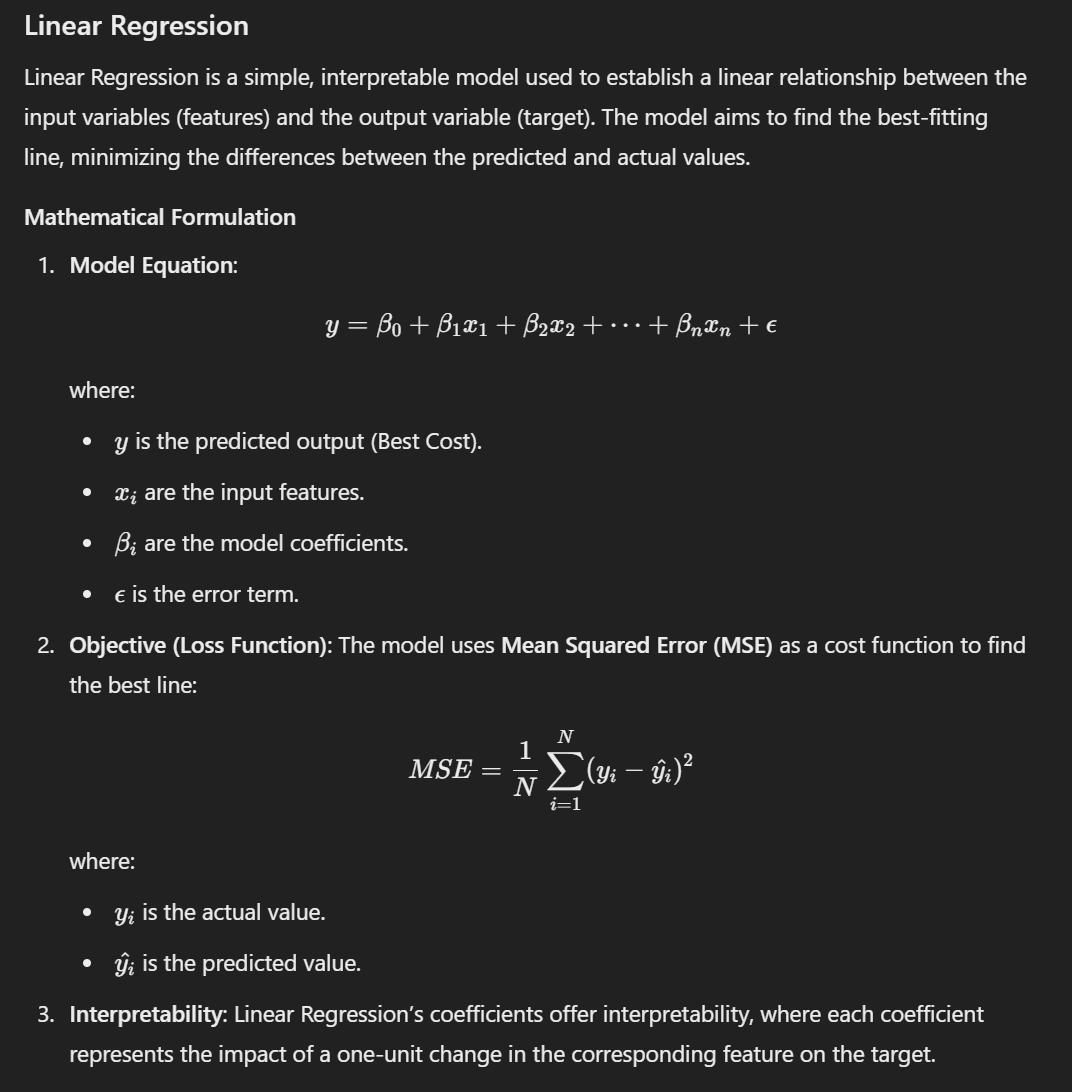
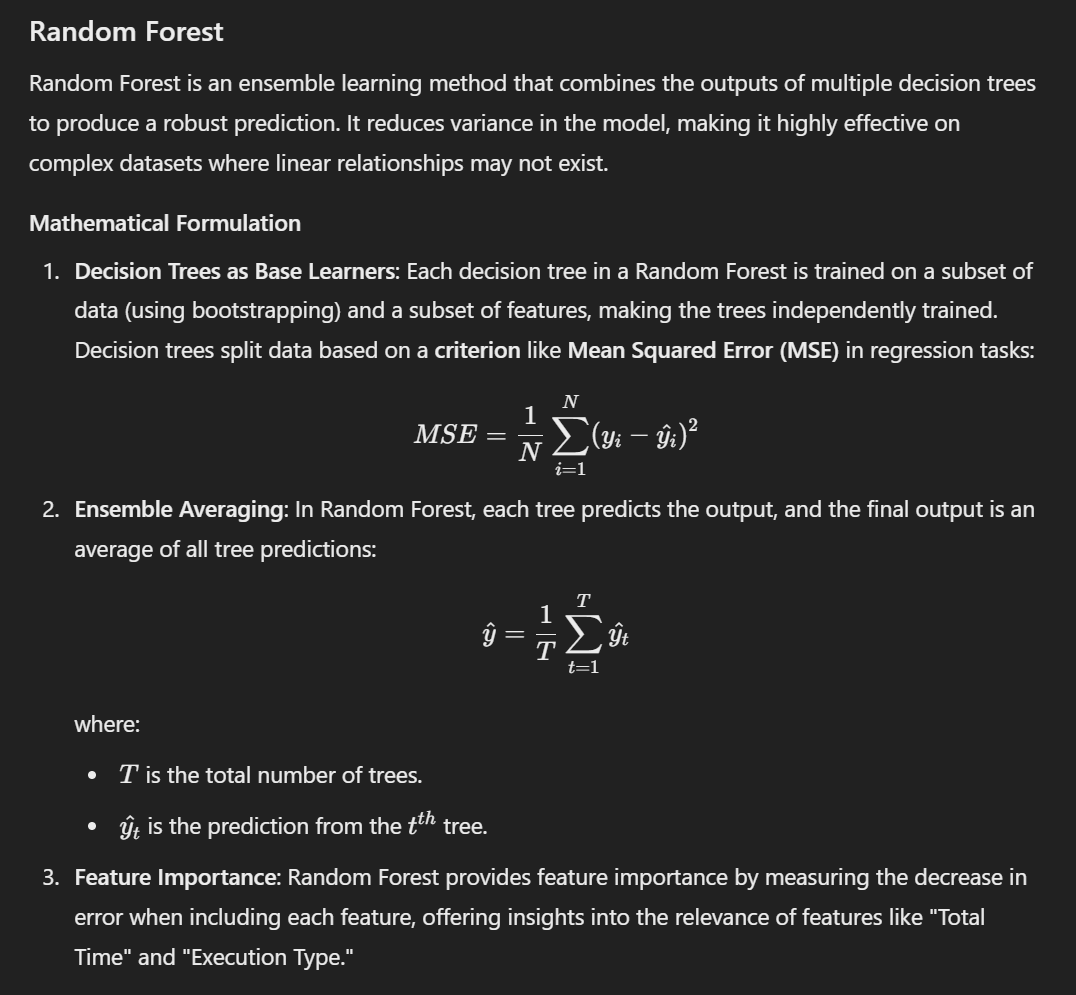
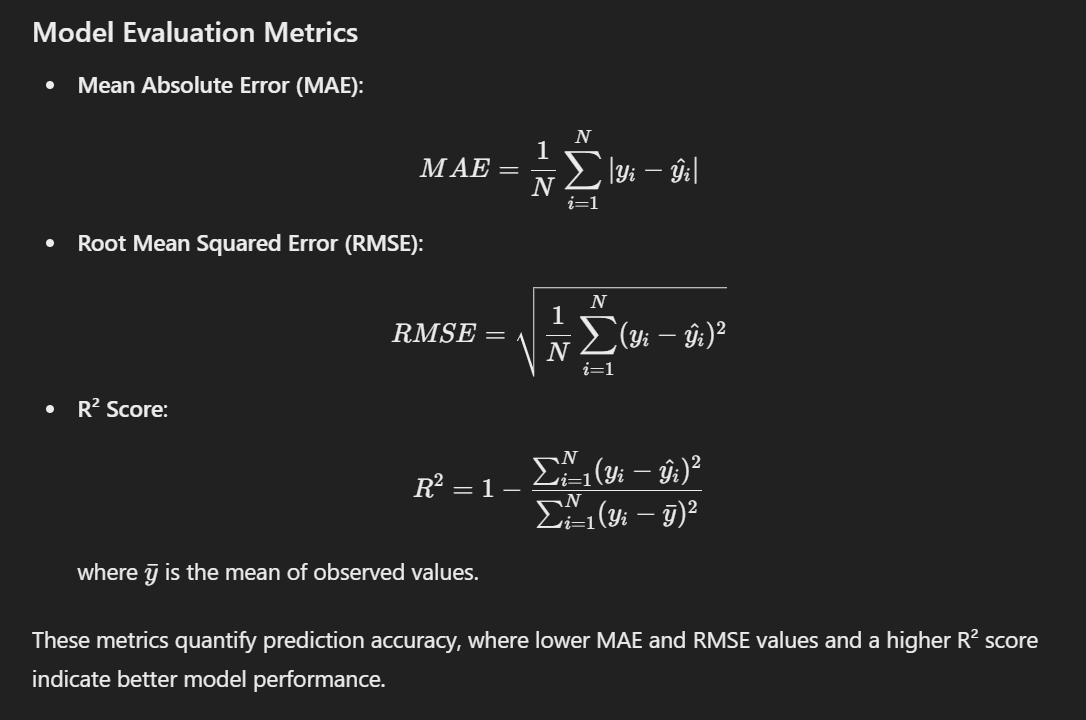

Linear Regression - MAE: 0.37454359824587075 RMSE: 0.4920796141072703 R2: 0.7768613536568976
Random Forest - MAE: 0.03856669458379944 RMSE: 0.06926110164005438 R2: 0.9955793835319183


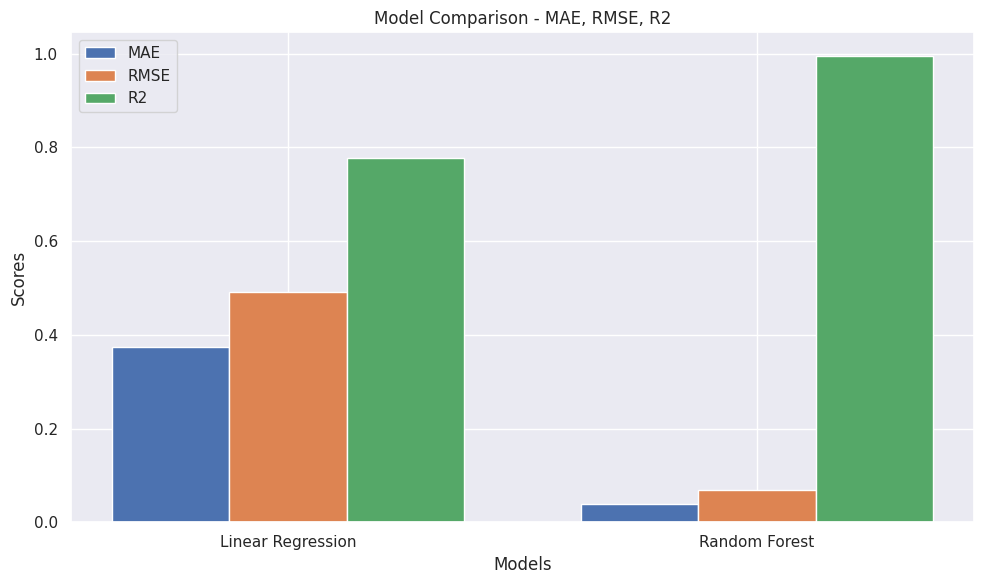

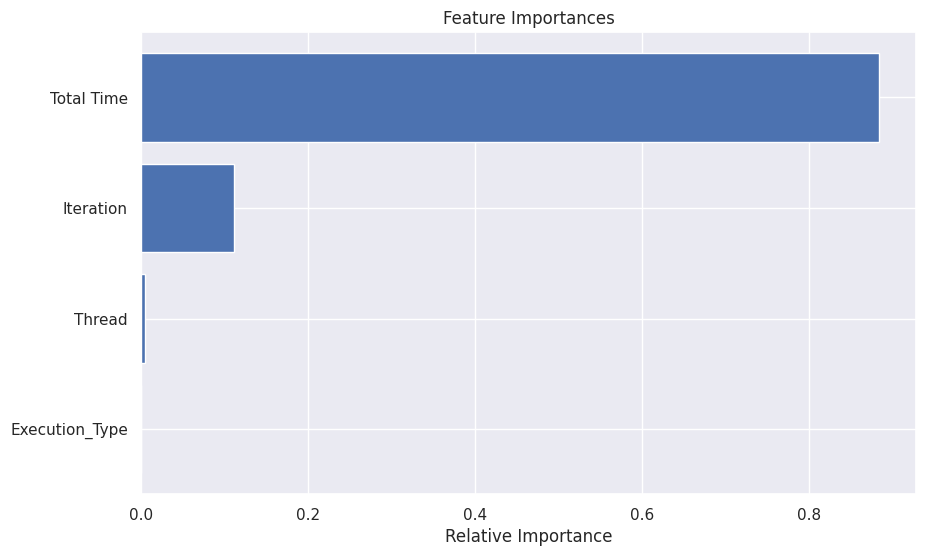

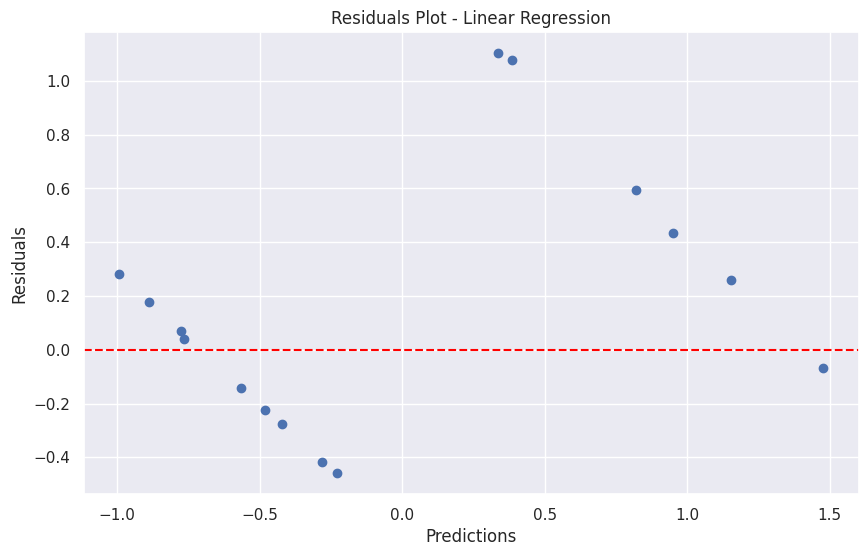

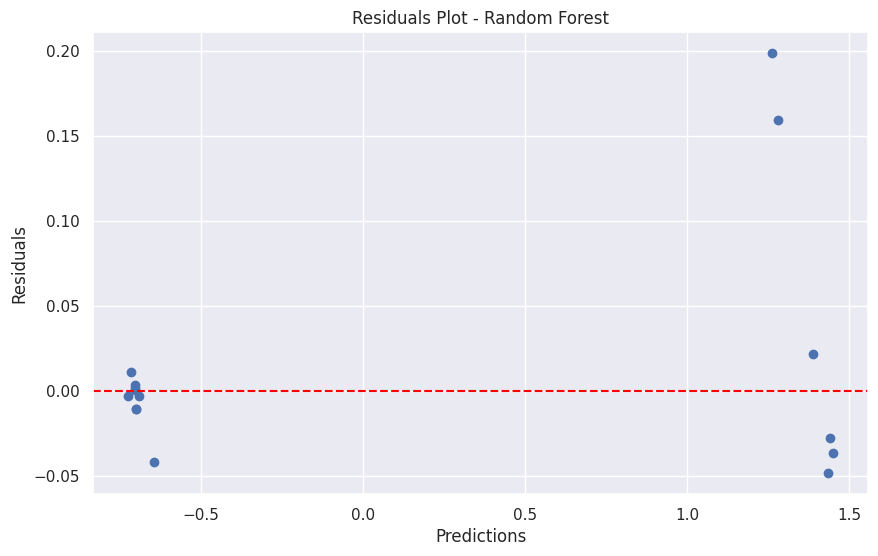

In [17]:
import pandas as pd
import os
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logging setup
logging.basicConfig(filename='tsp_model.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Load Results Data
def load_results_data(sequential_dir, parallel_dir):
    """Load results from Sequential and Parallel ILS runs."""
    try:
        # Load CSV files from sequential directory
        sequential_files = [f for f in os.listdir(sequential_dir) if f.endswith('.csv')]
        sequential_data = []
        for file in sequential_files:
            file_path = os.path.join(sequential_dir, file)
            try:
                seq_data = pd.read_csv(file_path)
                seq_data['Execution_Type'] = 'Sequential'
                seq_data['Thread'] = 0  # Add dummy column for consistency with parallel data
                sequential_data.append(seq_data)
            except Exception as e:
                logging.error(f"Error reading {file_path}: {e}")

        # Load Excel files from parallel directory
        parallel_files = [f for f in os.listdir(parallel_dir) if f.endswith('.xlsx')]
        parallel_data = []
        for file in parallel_files:
            file_path = os.path.join(parallel_dir, file)
            try:
                par_data = pd.read_excel(file_path, engine='openpyxl')  # Explicit engine
                par_data['Execution_Type'] = 'Parallel'
                parallel_data.append(par_data)
            except Exception as e:
                logging.error(f"Error reading {file_path}: {e}")

        # Combine datasets
        data = pd.concat(sequential_data + parallel_data, ignore_index=True)
        logging.info("Data loaded and concatenated successfully.")
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        raise

    return data

# Data Preprocessing
def preprocess_data(data):
    """Preprocess the data by handling missing values and encoding categorical features."""
    try:
        # Drop missing values
        data = data.dropna()

        # Encode Execution Type (Sequential = 0, Parallel = 1)
        data['Execution_Type'] = data['Execution_Type'].map({'Sequential': 0, 'Parallel': 1})

        # Standardize only numeric columns (Best Cost, Total Time)
        scaler = StandardScaler()
        data[['Best Cost', 'Total Time']] = scaler.fit_transform(data[['Best Cost', 'Total Time']])

        logging.info("Data preprocessing completed.")
    except Exception as e:
        logging.error(f"Error in preprocessing data: {e}")
        raise
    return data, scaler

# Feature Engineering
def feature_engineering(data):
    """Generate features and targets for model input."""
    X = data[['Execution_Type', 'Thread', 'Iteration', 'Total Time']]
    y = data['Best Cost']
    return X, y

# Model Training with Extended Hyperparameter Tuning
def train_models(X_train, y_train):
    """Train different models for predicting TSP best cost."""
    # Linear Regression Model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    logging.info("Linear Regression model trained.")

    # Random Forest Model with Detailed Hyperparameter Tuning
    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    rf_best = grid_search.best_estimator_
    logging.info(f"Random Forest model trained with best parameters: {grid_search.best_params_}")

    return lin_reg, rf_best

# Model Evaluation with Enhanced Reporting
def evaluate_model(model, X_test, y_test):
    """Evaluate the model using Mean Absolute Error, Mean Squared Error, and R2 Score."""
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    logging.info(f"Model Evaluation - MAE: {mae}, RMSE: {rmse}, R2: {r2}")
    return mae, rmse, r2, predictions

# Save Models
def save_models(scaler, lin_reg, rf_best, scaler_path, lin_reg_path, rf_best_path):
    """Save models and scaler for future use."""
    joblib.dump(scaler, scaler_path)
    joblib.dump(lin_reg, lin_reg_path)
    joblib.dump(rf_best, rf_best_path)
    logging.info("Models and scaler saved.")

# Plotting the results
def plot_model_comparison(lin_reg_metrics, rf_best_metrics):
    """Visualize MAE, RMSE, and R2 for both models."""
    models = ['Linear Regression', 'Random Forest']
    mae_values = [lin_reg_metrics[0], rf_best_metrics[0]]
    rmse_values = [lin_reg_metrics[1], rf_best_metrics[1]]
    r2_values = [lin_reg_metrics[2], rf_best_metrics[2]]

    # Plotting MAE, RMSE, R2
    x = np.arange(len(models))  # x locations for the groups
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, mae_values, width, label='MAE')
    ax.bar(x, rmse_values, width, label='RMSE')
    ax.bar(x + width, r2_values, width, label='R2')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Comparison - MAE, RMSE, R2')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    plt.tight_layout()
    plt.show()

def plot_feature_importance(rf_best, feature_names):
    """Visualize feature importance for Random Forest model."""
    feature_importances = rf_best.feature_importances_
    indices = np.argsort(feature_importances)

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), feature_importances[indices], align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# Residuals Plot
def plot_residuals(y_test, predictions, model_name):
    """Plot residuals for the model."""
    residuals = y_test - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals Plot - {model_name}")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

# Main function with enhanced error handling
def main():
    # Define directories
    sequential_dir = '/content/drive/MyDrive/iterated-local-search-traveling-salesman/results/results_sequential'
    parallel_dir = '/content/drive/MyDrive/iterated-local-search-traveling-salesman/results/results_parallel'

    try:
        # Load and preprocess data
        data = load_results_data(sequential_dir, parallel_dir)
        data, scaler = preprocess_data(data)

        # Feature Engineering
        X, y = feature_engineering(data)

        # Split the data for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train models
        lin_reg, rf_best = train_models(X_train, y_train)

        # Evaluate models
        lin_reg_metrics = evaluate_model(lin_reg, X_test, y_test)
        rf_best_metrics = evaluate_model(rf_best, X_test, y_test)

        # Display evaluation metrics
        print("Linear Regression - MAE:", lin_reg_metrics[0], "RMSE:", lin_reg_metrics[1], "R2:", lin_reg_metrics[2])
        print("Random Forest - MAE:", rf_best_metrics[0], "RMSE:", rf_best_metrics[1], "R2:", rf_best_metrics[2])

        # Plot model comparison
        plot_model_comparison(lin_reg_metrics, rf_best_metrics)

        # Plot feature importance for Random Forest
        plot_feature_importance(rf_best, X.columns)

        # Plot residuals for both models
        plot_residuals(y_test, lin_reg.predict(X_test), "Linear Regression")
        plot_residuals(y_test, rf_best.predict(X_test), "Random Forest")

        # Save models
        save_models(scaler, lin_reg, rf_best, 'scaler.pkl', 'lin_reg.pkl', 'rf_best.pkl')

    except Exception as e:
        logging.error(f"Error during execution: {e}")

# Execute main
if __name__ == "__main__":
    main()
